>> TRAINING DATA


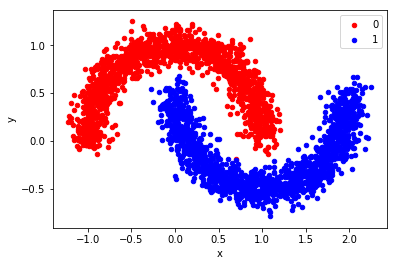

>> TEST DATA


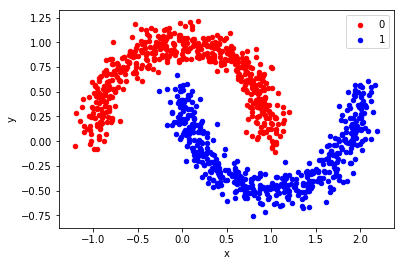

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_moons, make_circles 
from pandas import DataFrame

%matplotlib inline

#BLOB NEURAL NET 
#WITH SIGMOID NEURONS

#CREATE MOTHER DATA SET TO SPLIT INTO TRAINING AND TESTING 
#Xmother IS A MATRIX, ROW IS DATA POINT i AND COL REPRESENT FEATURES FOR THAT DATA

nsamples = 4000

Xmother, ymother = make_moons(n_samples = nsamples, noise=0.1, random_state=1)
X, X_test, y, y_test = train_test_split(Xmother, ymother, test_size= 0.25 , random_state=42)

print ">> TRAINING DATA"
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

print ">> TEST DATA"
df = DataFrame(dict(x=X_test[:,0], y=X_test[:,1], label=y_test))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()


In [3]:
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

In [4]:
#CREATE MATRIX OF Y ROWS AND 1 COL
Y = y.reshape(len(y),1)

In [5]:
#DEFINE NEURAL NETWORK PROPERTIES
n_input_node = 2
n_output_node = 1
n_hidden_node = 3
learning_rate = 0.01

In [6]:
#INITIALIZE WEIGHTS AND BIAS FOR EACH CONNECTION
np.random.seed(3)
w1 = np.random.randn(n_input_node,n_hidden_node)
b1 = np.zeros((1,n_hidden_node))
w2 = np.random.randn(n_hidden_node,n_output_node)
b2 = np.zeros((1,n_output_node))
print ">> INITIALIZING WEIGHTS AND BIASES FOR... W1, B1, W2, B2"
print ">> W1"
print w1
print ">> B1"
print b1
print ">> W2"
print w2
print ">> B2"
print b2

>> INITIALIZING WEIGHTS AND BIASES FOR... W1, B1, W2, B2
>> W1
[[ 1.78862847  0.43650985  0.09649747]
 [-1.8634927  -0.2773882  -0.35475898]]
>> B1
[[ 0.  0.  0.]]
>> W2
[[-0.08274148]
 [-0.62700068]
 [-0.04381817]]
>> B2
[[ 0.]]


In [7]:
#TRAIN NEURAL NET
max_iter = 2000 #1450
ls_cost_mse = np.zeros(max_iter)

for iter in range(max_iter):
    
    #FORWARD PROPAGATION
    z1 = np.dot(X,w1) + b1
    h1 = sigmoid(z1)
    z2 = np.dot(h1,w2) + b2
    h2 = sigmoid(z2)

    #BACKWARD PROPAGATION
    delta2 = -(h2 - Y)*(h2*(1-h2))
    delta1 = np.dot(delta2,w2.T) * (h1*(1-h1))
    
    dw2 = np.dot(h1.T,delta2)
    db2 = np.sum(delta2, axis=0).reshape(np.shape(b2))
    dw1 = np.dot(X.T,delta1)
    db1 = np.sum(delta1, axis=0).reshape(np.shape(b1))
    
    cost_mse = 0.5 * np.average((h2-Y)**2)    
    ls_cost_mse[iter] = cost_mse
    
    w1 += learning_rate*dw1
    b1 += learning_rate*db1
    w2 += learning_rate*dw2
    b2 += learning_rate*db2        
        
    if(iter % 500 == 0):
        abs_diff = np.absolute(Y - h2)        
        mdev = np.sum(abs_diff)/nsamples
        accuracy = np.round(h2) == Y
        accuracy_pct = np.sum(accuracy)*1.0/len(Y)
        print("Deviation: {0:.4f}, accuracy: {1:.4f}, after iteration {2}".format(mdev, accuracy_pct, iter+1))

Deviation: 0.3891, accuracy: 0.4943, after iteration 1
Deviation: 0.1265, accuracy: 0.8837, after iteration 501
Deviation: 0.1272, accuracy: 0.8867, after iteration 1001
Deviation: 0.0681, accuracy: 0.9950, after iteration 1501


In [8]:
#CREATE MESH POINTS FOR CREATING DECISION BOUNDARY
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

XY = np.c_[xx.ravel(), yy.ravel()]

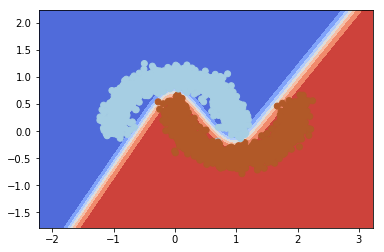

In [12]:
#APPLYING MODEL PARAMETERS TO MESH
Z1 = np.dot(XY,w1) + b1
H1 = sigmoid(Z1) #sigmoid(Z1)
Z2 = np.dot(H1,w2) + b2
H2 = sigmoid(Z2).reshape(xx.shape) #THE RESULT FOR EACH POINT ON THE MESH

plt.contourf(xx,yy,H2, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

#plt.plot(ls_cost_mse)
#plt.plot(ls_cost_mse_test, c = 'R')

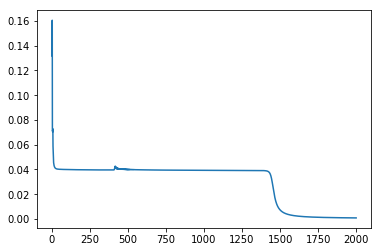

In [10]:
plt.plot(ls_cost_mse)